In [602]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

## Data clean

In [612]:
df = pd.read_excel(r"C:\Users\Roman Shypka\OneDrive\Робочий стіл\csv_car.xlsx")

In [624]:
df.head(5)

,model,year,price,transmission,mileage,fuelType,engineSize,liters_per_100km
0,A1,2017,12500,Manual,15735,Petrol,1.4,5.1
1,A6,2016,16500,Automatic,36203,Diesel,2.0,4.4
2,A1,2016,11000,Manual,29946,Petrol,1.4,5.1
3,A4,2017,16800,Automatic,25952,Diesel,2.0,4.2
4,A3,2019,17300,Manual,1998,Petrol,1.0,5.7


In [ ]:
df = df.dropna(how="all") # delete null value 

In [519]:
df.isnull().sum() # Quantity null value 

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [517]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70398 entries, 0 to 70397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         70398 non-null  object 
 1   year          70398 non-null  int64  
 2   price         70398 non-null  int64  
 3   transmission  70398 non-null  object 
 4   mileage       70398 non-null  int64  
 5   fuelType      70398 non-null  object 
 6   tax           70398 non-null  int64  
 7   mpg           70398 non-null  float64
 8   engineSize    70398 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 4.8+ MB


 ## Data analysis

In [687]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'fuelType', 'engineSize',
       'liters_per_100km', 'Brand', 'Transmission_value', 'Brand_Code',
       'Mileage_km'],
      dtype='object')

In [518]:
df.describe() ## describe all columns 

,year,price,mileage,tax,mpg,engineSize
count,70398.000000,70398.000000,70398.000000,70398.000000,70398.000000,70398.000000
mean,2017.076550,18037.205361,23181.649095,120.287011,56.174424,1.724401
std,2.141514,10597.516999,21342.702158,64.523369,17.421733,0.605706
min,1970.000000,495.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,10700.000000,7374.000000,125.000000,47.900000,1.200000
50%,2017.000000,15750.000000,17410.000000,145.000000,56.500000,1.600000
75%,2019.000000,22450.000000,32466.750000,145.000000,64.200000,2.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


In [520]:
df["price"].sort_values(ascending=False)  # max price cars


50473    159999
54318    154998
44279    149948
4783     145000
53011    140319
          ...  
35671       675
38260       675
38353       675
56090       650
38552       495
Name: price, Length: 70398, dtype: int64

In [521]:
df["price"].sort_values(ascending=True) # min price cars

38552       495
56090       650
38260       675
35671       675
38353       675
          ...  
53011    140319
4783     145000
44279    149948
54318    154998
50473    159999
Name: price, Length: 70398, dtype: int64

In [583]:
df_corr = df_numeric.corr()
df_corr["price"].sort_values(ascending=False)  ## correletion price 

price               1.000000
engineSize          0.642099
year                0.493913
liters_per_100km    0.253504
Mileage_km         -0.423437
Name: price, dtype: float64

# Preparation of data for the model 

In [670]:
df['Mileage_km'] = (df['mileage'] * 1.60934).round(0).astype(int) #add new features for ukrainian people 

In [615]:
df["liters_per_100km"] = (282.48 / df["mpg"]).round(1) #add new features for ukrainian people 

In [547]:
df["transmission"].unique()

array(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype=object)

In [ ]:
transmission_map = {"Manual": 1 , "Other": 1 , "Semi-Auto": 2 , "Automatic": 3}
df["Transmission_value"] = df["transmission"].map(transmission_map)

In [650]:
df["Brand"] = "Uknown" 
# add brend in my dataset 
df.loc[0:10667, 'Brand'] = "Audi"
df.loc[10667:21448, 'Brand'] = "BMW"
df.loc[21449:39413, 'Brand'] = "Ford"
df.loc[39414:44273, 'Brand'] = "Hyundai" 
df.loc[44274:57392, 'Brand'] = "Mercedes"
df.loc[57393:63659, 'Brand'] = "Skoda"
df.loc[63660:70397, 'Brand'] = "Toyota"

In [657]:
df["Brand_Code"] = LabelEncoder().fit_transform(df["Brand"]) #add brend for model RandomForest

In [683]:
df_numeric = df.select_dtypes(include=["number"]) # create new dataframe with only numbers , for correlation 



In [688]:
df_numeric.head(5)

,year,price,engineSize,liters_per_100km,Transmission_value,Brand_Code,Mileage_km
0,2017,12500,1.4,5.1,1,0,25323
1,2016,16500,2.0,4.4,3,0,58263
2,2016,11000,1.4,5.1,1,0,48193
3,2017,16800,2.0,4.2,3,0,41766
4,2019,17300,1.0,5.7,1,0,3215


## Model training

In [676]:
X = df_numeric[["year","Mileage_km","engineSize","liters_per_100km","Transmission_value","Brand_Code"]]
y = df_numeric[["price"]]

In [677]:
# splittin the dataframe into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#initializing the RandomForestRegressor Model
model = RandomForestRegressor(n_estimators=100,random_state=42)
# Training the model on training data
model.fit(X_train,y_train.values.ravel())


RandomForestRegressor(random_state=42)

In [678]:
#making predictions on the unseen data
predictions = model.predict(X_test)

In [689]:
erorr_mean = mean_absolute_error(y_test,predictions)
erorr_mean  

1531.0783534324776

In [690]:
features_df = pd.DataFrame({"Feature":X_train.columns, "Importance":model.feature_importances_})

In [691]:
features_df

,Feature,Importance
0,year,0.244296
1,Mileage_km,0.068644
2,engineSize,0.253865
3,liters_per_100km,0.156130
4,Transmission_value,0.243339
5,Brand_Code,0.033726


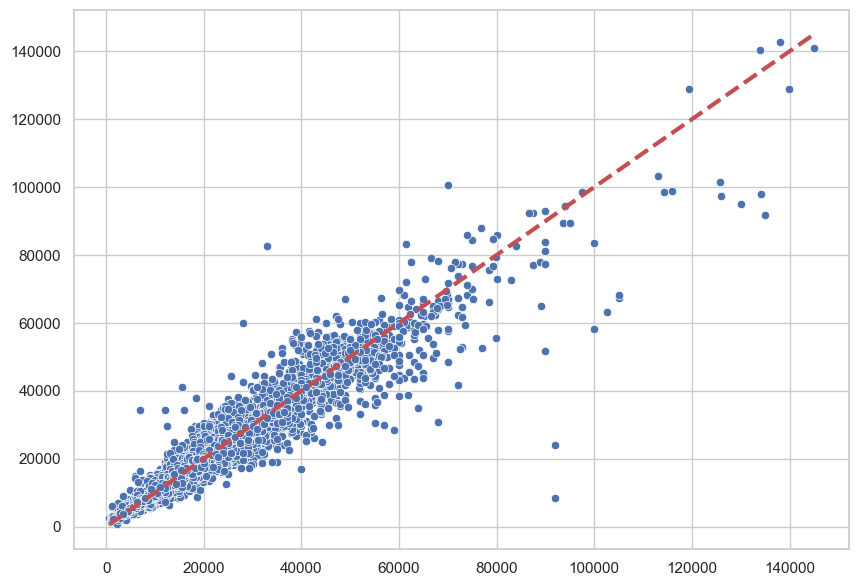

In [685]:
plt.figure(figsize=(10,7))

sns.scatterplot(x=y_test.values.ravel(),y=predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)